In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('./data/Case.csv')
data2 = pd.read_csv('./data/PatientInfo.csv')
data3 = pd.read_csv('./data/PatientRoute.csv')
data4 = pd.read_csv('./data/Policy.csv')
data5 = pd.read_csv('./data/TimeAge.csv')

In [38]:
data3.head(10)

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
5,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,public_transportation,37.590330,127.015221
6,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.589590,127.009766
7,1000000002,5.0,2020-01-27,Seoul,Seongbuk-gu,restaurant,37.592057,127.018898
8,1000000002,5.0,2020-01-27,Seoul,Dongdaemun-gu,store,37.566262,127.065815
9,1000000002,5.0,2020-01-28,Seoul,Seongbuk-gu,etc,37.591669,127.018420


In [39]:
data2.head(10)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,10.0,female,1966,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1000000003,43,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,11.0,male,1995,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1000000003,0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,13.0,male,1992,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68,NaN,2020-02-05,2020-02-21,NaN,released
9,1000000010,21.0,female,1960,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.0,1000000003,6,NaN,2020-02-05,2020-02-29,NaN,released


In [40]:
age = data2.loc[:]['age'].str.replace('[^\d]', "").value_counts()
df = pd.DataFrame(age)
df = df.reset_index()
columns = ['age', 'sum']
df.columns = columns
df['age'] = df['age'].astype(np.int64)
df = df.sort_values(by=['age'])
df

,age,sum
8,0,60
7,10,160
0,20,860
2,30,494
3,40,483
1,50,625
4,60,423
5,70,210
6,80,162
9,90,47


#### 나이별 감염자 수
가설 : 20,30대가 많을꺼라 생각을 했지만 의외로 50대가 2순위를 차지하였다.

==> 20, 50대의 감염자수가 많으므로 방문하는 곳을 찾아볼 필요해 있어보인다.

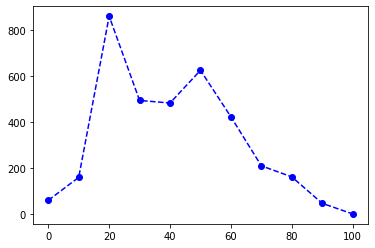

In [41]:
# 나이별 감염자 수

x = df['age'].values
y = df['sum'].values

plt.plot(x, y, color='blue', marker='o', linestyle='--')
plt.show()

#### etc와 병원루트제거

In [45]:
idx = data3[(data3['type'] == 'etc') | (data3['type'] == 'hospital') | (data3['type'] == 'pharmacy')].index
data3_1 = data3.drop(idx)
data3_1.head(10)

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
5,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,public_transportation,37.590330,127.015221
6,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.589590,127.009766
7,1000000002,5.0,2020-01-27,Seoul,Seongbuk-gu,restaurant,37.592057,127.018898
8,1000000002,5.0,2020-01-27,Seoul,Dongdaemun-gu,store,37.566262,127.065815
10,1000000002,5.0,2020-01-28,Seoul,Jungnang-gu,store,37.588923,127.076681
11,1000000002,5.0,2020-01-28,Seoul,Jungnang-gu,restaurant,37.589035,127.091943
12,1000000002,5.0,2020-01-28,Seoul,Gangnam-gu,public_transportation,37.523674,127.046543


#### 20, 50대의 방문장소를 확인하기 위한 작업

In [46]:
df2 = pd.merge(data2, data3_1, on='patient_id')
df2 = df2.loc[:,['patient_id', 'age', 'type']]
df2[(df2['age'] == '50s') | (df2['age'] == '20s')].to_csv('20,50대 방문장소.csv')

#### 20대가 가장많이 방문 장소, 50대가 가장많이 방문 장소

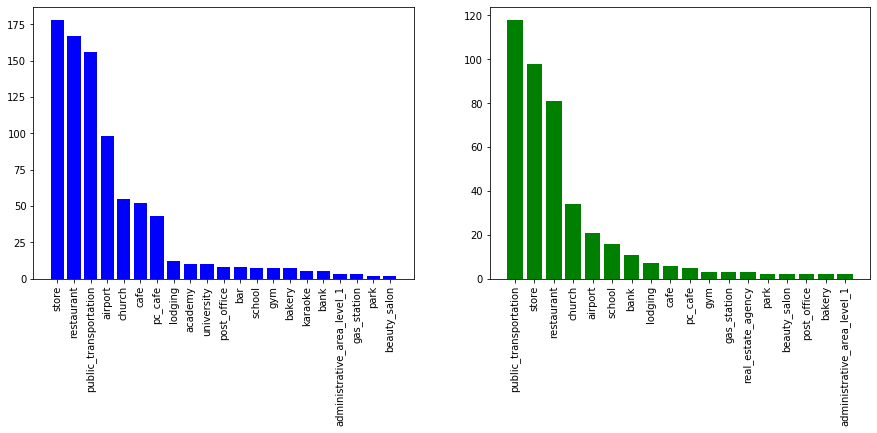

In [47]:
dt = pd.read_csv('./20,50대 방문장소.csv')
place1 = dt['type'][dt['age'] == '20s'].value_counts()
x = place1.index
y = place1.values

place2 = dt['type'][dt['age'] == '50s'].value_counts()
x2 = place2.index
y2 = place2.values

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].bar(x, y, color='blue')
axes[0].set_xticklabels(x, rotation='vertical')
axes[1].bar(x2, y2, color='green')
axes[1].set_xticklabels(x2, rotation='vertical')
plt.show()

#### 사회적거리두기 데이터들고오기

In [10]:
data4_alert = data4[data4['gov_policy'] == 'Social Distancing Campaign']
data4_alert

,policy_id,country,type,gov_policy,detail,start_date,end_date
28,29,Korea,Social,Social Distancing Campaign,Strong,2020-03-22,2020-04-05
29,30,Korea,Social,Social Distancing Campaign,Strong,2020-04-06,2020-04-19
30,31,Korea,Social,Social Distancing Campaign,Weak,2020-04-20,2020-05-05


In [11]:
alert = data4_alert.loc[:,['detail','start_date', 'end_date']]
alert['start_date'] = alert['start_date'].str.replace('-', "")
alert['end_date'] = alert['end_date'].str.replace('-', "")
alert

,detail,start_date,end_date
28,Strong,20200322,20200405
29,Strong,20200406,20200419
30,Weak,20200420,20200505


#### 사회적 거리두기 기간 나이별 감염된 환자수 확인

In [12]:
data2 = data2.dropna(subset=['age', 'confirmed_date'])

In [13]:
data2 = data2.loc[:,['patient_id', 'age', 'confirmed_date']]
data2['age'] = data2['age'].str.replace("s", "")
data2['age'] = data2['age'].astype(np.int64)
data2['confirmed_date'] = data2['confirmed_date'].str.replace("-", "")
data2['confirmed_date'] = data2['confirmed_date'].astype(np.int64)
data2

,patient_id,age,confirmed_date
0,1000000001,50,20200123
1,1000000002,30,20200130
2,1000000003,50,20200130
3,1000000004,20,20200130
4,1000000005,20,20200131
...,...,...,...
3999,7000000010,20,20200403
4000,7000000011,30,20200403
4001,7000000012,20,20200403
4002,7000000013,10,20200414


In [14]:
social_distance_2_1 = data2[(data2['confirmed_date'] > 20200322) & (data2['confirmed_date'] < 20200405)]
social_distance_2_2 = data2[(data2['confirmed_date'] > 20200406) & (data2['confirmed_date'] < 20200419)]
social_distance_1_1 = data2[(data2['confirmed_date'] > 20200420) & (data2['confirmed_date'] < 20200505)]

#### 사회적거리두기 1단계 기간동안 감염된 확진자 수

In [15]:
c = social_distance_1_1['age'].value_counts().sort_index()
c = np.concatenate((c, [0]), axis = 0)

#### 사회적거리두기 2단계 기간동안 감염된 확인자 수

In [16]:
a = social_distance_2_1['age'].value_counts().sort_index()
b = social_distance_2_2['age'].value_counts().sort_index()

In [17]:
social_distance_2_total = a.values + b.values
age = a.index

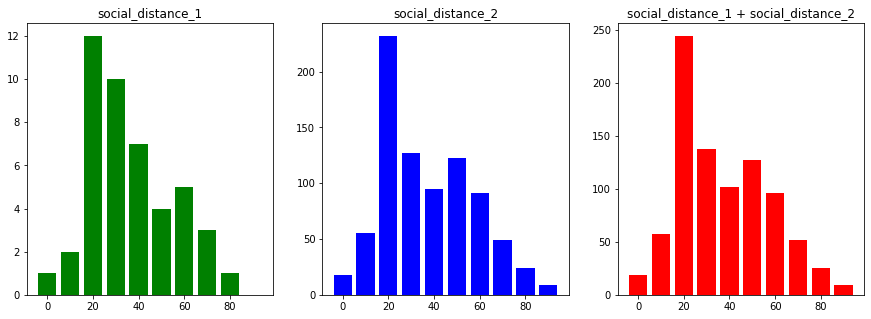

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].set_title('social_distance_1')
axes[0].bar(age, c, color='green', width=8)
axes[1].set_title('social_distance_2')
axes[1].bar(age, social_distance_2_total, color='blue', width=8)
axes[2].set_title('social_distance_1 + social_distance_2')
axes[2].bar(age, social_distance_2_total+c, color='red', width=8)
plt.show()

In [19]:
df3_1 = pd.merge(data3_1, social_distance_2_1, on='patient_id')
place3 = df3_1['type'][df3_1['age'] == 20].value_counts()
df3_2 = pd.merge(data3_1, social_distance_2_1, on='patient_id')
place4 = df3_2['type'][df3_2['age'] == 50].value_counts()

df4_1 = pd.merge(data3_1, social_distance_2_2, on='patient_id')
place5 = df4_1['type'][df4_1['age'] == 20].value_counts()
df4_2 = pd.merge(data3_1, social_distance_2_2, on='patient_id')
place6 = df4_2['type'][df4_2['age'] == 50].value_counts()

df5_1 = pd.merge(data3_1, social_distance_1_1, on='patient_id')
place7 = df5_1['type'][df5_1['age'] == 20].value_counts()
df5_2 = pd.merge(data3_1, social_distance_1_1, on='patient_id')
place8 = df5_2['type'][df5_2['age'] == 50].value_counts()

####  사회적거리두기 기간동안 20, 50대 감염자 방문장소 확인

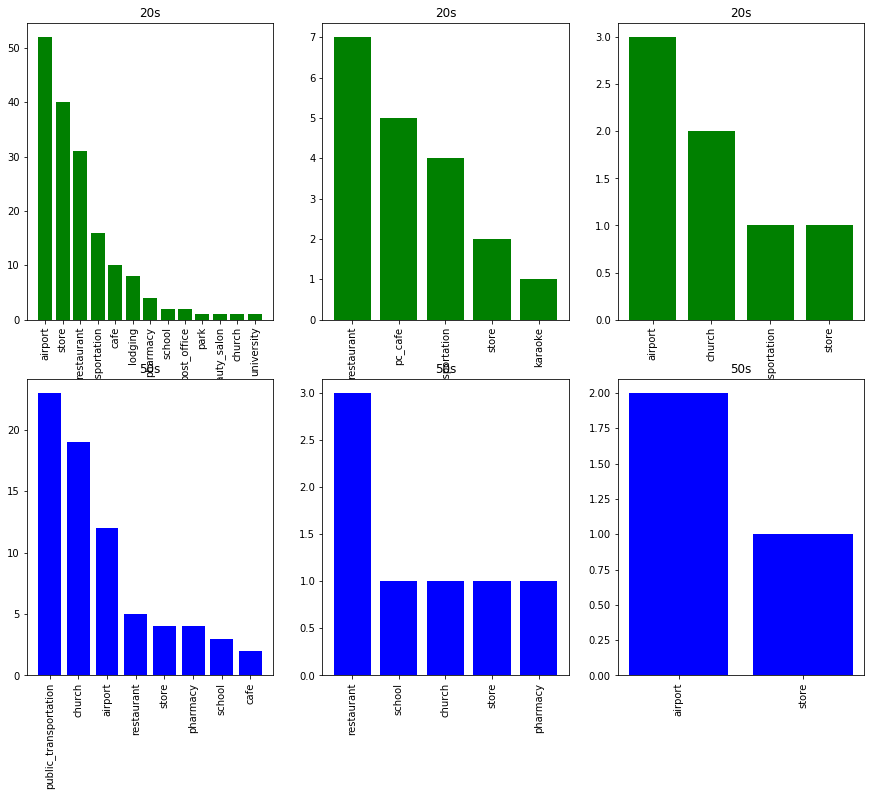

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(15,12))
axes[0][0].set_title('20s')
axes[0][0].bar(place3.index, place3.values, color='green')
axes[0][0].set_xticklabels(place3.index, rotation='vertical')
axes[1][0].set_title('50s')
axes[1][0].bar(place4.index, place4.values, color='blue')
axes[1][0].set_xticklabels(place4.index, rotation='vertical')

axes[0][1].set_title('20s')
axes[0][1].bar(place5.index, place5.values, color='green')
axes[0][1].set_xticklabels(place5.index, rotation='vertical')
axes[1][1].set_title('50s')
axes[1][1].bar(place6.index, place6.values, color='blue')
axes[1][1].set_xticklabels(place6.index, rotation='vertical')

axes[0][2].set_title('20s')
axes[0][2].bar(place7.index, place7.values, color='green')
axes[0][2].set_xticklabels(place7.index, rotation='vertical')
axes[1][2].set_title('50s')
axes[1][2].bar(place8.index, place8.values, color='blue')
axes[1][2].set_xticklabels(place8.index, rotation='vertical')

plt.show()